In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import os
%matplotlib inline

# Load both datasets for visual EDA

In [30]:
neos_df = pd.read_csv('data/neos.csv', low_memory=False)

In [31]:
neos_df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,G,...,n_obs_used,n_del_obs_used,n_dop_obs_used,condition_code,rms,two_body,A1,A2,A3,DT
0,a0000433,2000433,433 Eros (A898 PA),433,Eros,NaN,Y,N,10.4,0.46,...,8767,4.0,2.0,0.0,0.28397,NaN,NaN,NaN,NaN,NaN
1,a0000719,2000719,719 Albert (A911 TB),719,Albert,NaN,Y,N,15.5,NaN,...,1874,NaN,NaN,0.0,0.39148,NaN,NaN,NaN,NaN,NaN
2,a0000887,2000887,887 Alinda (A918 AA),887,Alinda,NaN,Y,N,13.8,-0.12,...,1424,NaN,NaN,0.0,0.48159,NaN,NaN,NaN,NaN,NaN
3,a0001036,2001036,1036 Ganymed (A924 UB),1036,Ganymed,NaN,Y,N,9.4,0.30,...,6249,0.0,1.0,0.0,0.38525,NaN,NaN,NaN,NaN,NaN
4,a0001221,2001221,1221 Amor (1932 EA1),1221,Amor,NaN,Y,N,17.7,NaN,...,540,NaN,NaN,0.0,0.45568,NaN,NaN,NaN,NaN,NaN


In [26]:
with open('data/cad.json') as json_data:
    cad_dict = json.load(json_data)

In [21]:
cad_df = pd.DataFrame.from_dict(cad_dict['data']) #, orient='index').T.set_index('index')

In [27]:
cad_df.columns = list(cad_dict['fields'])

In [29]:
cad_df.head()

,des,orbit_id,jd,cd,dist,dist_min,dist_max,v_rel,v_inf,t_sigma_f,h
0,170903,105,2415020.507669610,1900-Jan-01 00:11,0.0921795123769547,0.0912006569517418,0.0931589328621254,16.7523040362574,16.7505784933163,01:00,18.1
1,2005 OE3,52,2415020.606013490,1900-Jan-01 02:33,0.414975519685102,0.414968315685577,0.414982724454678,17.918395877175,17.9180375373357,< 00:01,20.3
2,2006 XO4,15,2415020.634068074,1900-Jan-01 03:13,0.114291499199114,0.114272705486348,0.114310301346124,7.39720266467069,7.3940503943318,00:23,23.4
3,7088,233,2415020.709345747,1900-Jan-01 05:01,0.237367466253556,0.237366346954997,0.237368585559926,4.78123058453747,4.77888225987132,< 00:01,16.7
4,2017 EE23,6,2415020.802629888,1900-Jan-01 07:16,0.388708125934362,0.380148975861157,0.40205426614884,9.93428771818077,9.93359768958909,7_06:11,21.7


# Suggested exploratory questions

#### How many NEOs are in the neos.csv data set?

In [33]:
len(neos_df)

23967

#### What is the primary designation of the first Near Earth Object in the neos.csv data set?

In [41]:
neos_df.pdes[0]

'433'

#### What is the diameter of the NEO whose name is "Apollo"?

In [53]:
neos_df.loc[neos_df.name=='Apollo']["diameter"]

10    1.5
Name: diameter, dtype: float64

#### How many NEOs have IAU names in the data set?

In [60]:
np.sum(neos_df.name.count())

343

#### How many NEOs have diameters in the data set?

In [61]:
np.sum(neos_df.diameter.count())

1268

#### How many close approaches are in the cad.json data set

In [62]:
len(cad_df)

406785

#### On January 1st, 2000, how close did the NEO whose primary designation is "2015 CL" pass by Earth?

In [89]:
cad_df.loc[(cad_df.cd >"1999-Dec-31") & (cad_df.cd < "2000-Jan-2") & (cad_df.des == "2015 CL")].dist

180844    0.144929602021186
Name: dist, dtype: object

#### On January 1st, 2000, how fast did the NEO whose primary designation is "2002 PB" pass by Earth?

In [90]:
cad_df.loc[(cad_df.cd > "1999-Dec-31") & (cad_df.cd < "2000-Jan-2") & (cad_df.des == "2002 PB")].v_rel

180845    29.3862908945476
Name: v_rel, dtype: object

# Plots for better visual analysis

In [91]:
neos_df.columns

Index(['id', 'spkid', 'full_name', 'pdes', 'name', 'prefix', 'neo', 'pha', 'H',
       'G', 'M1', 'M2', 'K1', 'K2', 'PC', 'diameter', 'extent', 'albedo',
       'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'H_sigma',
       'diameter_sigma', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal',
       'equinox', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp',
       'tp_cal', 'per', 'per_y', 'moid', 'moid_ld', 'moid_jup', 't_jup',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp', 'sigma_per', 'class',
       'producer', 'data_arc', 'first_obs', 'last_obs', 'n_obs_used',
       'n_del_obs_used', 'n_dop_obs_used', 'condition_code', 'rms', 'two_body',
       'A1', 'A2', 'A3', 'DT'],
      dtype='object')

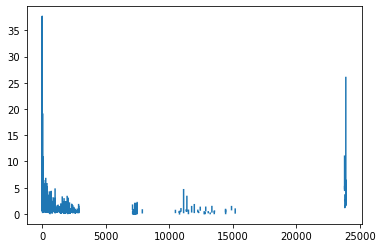

In [92]:
neos_df.diameter.plot()